<a href="https://colab.research.google.com/github/simonbustamante/mit-sistemas-de-recomendaciones/blob/master/Caso_de_estudio_4_1_Sistema_de_recomendaci%C3%B3n_Principiante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de Estudio 4.1 Sistema de recomendación

## Configuración

Ejecute (Run) estas celdas para instalar los paquetes necesarios para completar el caso de estudio. Esto podría llevar unos minutos así que sea paciente.

In [3]:
!pip install --upgrade pip
!pip install surprise==0.1
print('Librerías instaladas con éxito!')

Librerías instaladas con éxito!


Si no ha obtenido ningún texto en rojo indicando error entonces la instalación ha terminado con éxito. El texto en amarillo son avisos, no errores.

<h1>Atención:</h1>

Ahora ha de reiniciar el entorno de ejecución. Para ello vaya a:

> Entorno de ejecución > _Reiniciar entorno de ejecución_

en la parte superior de su pantalla. Esto asegurará que sus cambio se han realizado con éxito.

## Importar

from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate




Importe las librerías necesarias para el desarrollo del caso.

In [4]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
print('Librerías faltantes importadas !')

Librerías faltantes importadas !


In [5]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
%matplotlib inline
print('Librerías importadas con éxito!')

Librerías importadas con éxito!


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Datos

In [7]:
data = Dataset.load_builtin('ml-100k')
print('\n\nData load successful!')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


Data load successful!


[Base de datos](https://files.grouplens.org/datasets/movielens/ml-100k.zip)

Carga de histograma con las valoraciones de 1 a 5 según cantidad de usuarios que puntuaron las peliculas



Histograma generado con éxito!


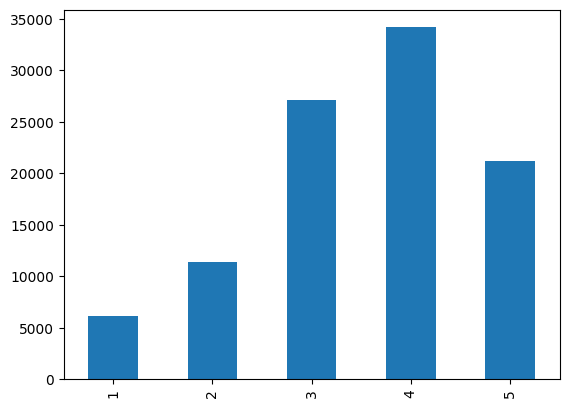

In [8]:
# 1. Obtener el archivo de valoraciones (ratings) del objeto "data"
ratings_file = data.ratings_file

# 2. Cargue la tabla usando pandas, una herramienta común de tratamiento de datos
# Se establecen los nombres de las columnas de forma manual en este caso
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Obtener la columna de valoraciones (ratings)
ratings = raw_data.rating

# 4. Generar un gráfico de barras/histograma con dichos datos
ratings.value_counts().sort_index().plot.bar()

print('\n\nHistograma generado con éxito!')

In [9]:
# Vamos a generar los porcentages de cada uno de los valores de los ratings
print(ratings.value_counts().sort_index())

1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64


In [10]:
print(ratings.value_counts(normalize=True)*100)

4    34.174
3    27.145
5    21.201
2    11.370
1     6.110
Name: rating, dtype: float64




La cantidad de valores de los 5 mayores y menores valores son
50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: item_id, Length: 1682, dtype: int64


Histograma Item_id v/s Cantidad!


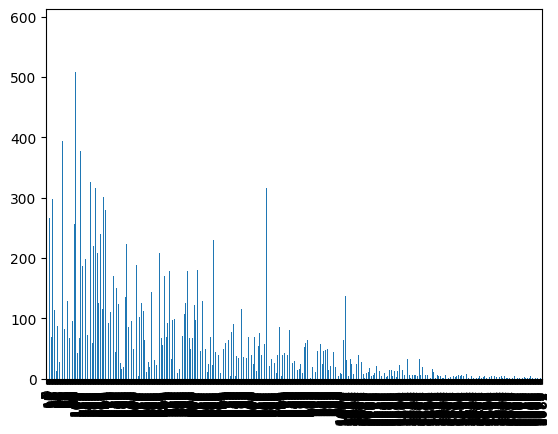

In [11]:
# Obtener la columna de valoraciones del item_id
item = raw_data.item_id

# Imprimier la cantidad de valores por columna item_id
print('\n\nLa cantidad de valores de los 5 mayores y menores valores son')
print(item.value_counts())

# Generar un gráfico de barras/histograma de Item_id
item.value_counts().sort_index().plot.bar()

print('\n\nHistograma Item_id v/s Cantidad!')



La cantidad de valores de los 5 mayores y menores valores son
405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: user_id, Length: 943, dtype: int64


Histograma user_id v/s Cantidad!


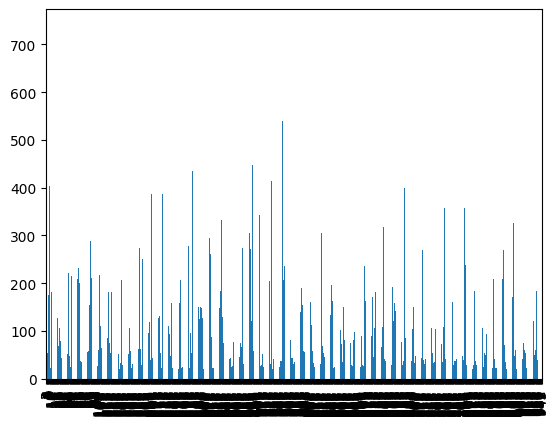

In [12]:
# Obtener la columna de valoraciones del user_id
user = raw_data.user_id

# Imprimier la cantidad de valores por columna user_id
print('\n\nLa cantidad de valores de los 5 mayores y menores valores son')
print(user.value_counts())

# Generar un gráfico de barras/histograma de user_id
user.value_counts().sort_index().plot.bar()

print('\n\nHistograma user_id v/s Cantidad!')

In [13]:
print(raw_data)

       user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]


In [14]:
len(ratings)

100000

In [15]:
raw_data.nunique()

user_id        943
item_id       1682
rating           5
timestamp    49282
dtype: int64

In [16]:
print(raw_data.describe)

<bound method NDFrame.describe of        user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]>


In [17]:
print(raw_data.rating.isnull)

<bound method Series.isnull of 0        3
1        3
2        1
3        2
4        1
        ..
99995    3
99996    5
99997    1
99998    2
99999    3
Name: rating, Length: 100000, dtype: int64>


**<h1>PREGUNTA 1: ANÁLISIS DE DATOS</h1>**

# Describe la forma de los datos, ¿como estan distribuidos? ¿Cuantas valoraciones hay disponibles?



Los datos provienen del dataset 'ml-100k', el cual es un conjunto de datos clásico que contiene 100,000 valoraciones de películas por parte de usuarios en MovieLens. Cada entrada del conjunto de datos contiene un identificador de usuario (`user_id`), un identificador de ítem (`item_id` que aquí corresponde a películas), una valoración (`rating`), y una marca de tiempo (`timestamp`).

La distribución de las valoraciones (en forma de histograma) se ha generado a partir de los valores de la columna `rating`. Las valoraciones están en una escala de 1 a 5 y se proporcionaron los siguientes conteos para cada valoración:

- 1: 6,110 veces
- 2: 11,370 veces
- 3: 27,145 veces
- 4: 34,174 veces
- 5: 21,201 veces

Además, se proporcionó la distribución porcentual de las valoraciones:

- 4: 34.174%
- 3: 27.145%
- 5: 21.201%
- 2: 11.370%
- 1: 6.110%

Esto indica que la valoración más común es 4, seguida de 3 y 5. Las valoraciones 1 y 2 son menos frecuentes. Este patrón indica un sesgo hacia valoraciones más altas en el conjunto de datos.

El número total de valoraciones disponibles es 100,000

En cuanto a los ítems (`item_id`), los cinco con más valoraciones se listaron, con el ítem número 50 recibiendo 583 valoraciones. Esto sugiere que hay algunos ítems que son mucho más populares y frecuentemente valorados que otros. Los histogramas de `item_id` y `user_id` probablemente mostrarían la frecuencia con la que cada película y cada usuario han sido valorados, respectivamente.

Los `user_id` también se mostraron con variaciones en el número de valoraciones, donde algunos usuarios valoraron muchos más ítems que otros, como se evidencia por el usuario 405 con 737 valoraciones.

También, se ha confirmado que no hay valores nulos en la columna `rating`, lo que significa que todas las 100,000 valoraciones son válidas y pueden ser utilizadas para análisis o modelos de aprendizaje automático.


## Modelo 1: aleatorio

In [18]:
# Crear el objeto para el modelo
model_random = NormalPredictor()
print('\n\nModelo aleatorio creado con éxito!')



Modelo aleatorio creado con éxito!


In [19]:
# Entrenar con los datos usando validación cruzada con k=5
# iteraciones, midiendo el RECM
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5191  1.5251  1.5164  1.5156  1.5213  1.5195  0.0034  
Fit time          0.19    0.15    0.16    0.15    0.14    0.16    0.02    
Test time         0.14    0.20    0.09    0.08    0.20    0.14    0.05    


Entrenamiento del modelo finalizado con éxito!


## Modelo 2: filtrado colaborativo basado en usuarios

### Creación Modelo KNNBasic

In [20]:
# Crear el objeto para el modelo
model_user = KNNBasic(sim_options={'user_based': True})
print('\n\nModelo creado con éxito!')



Modelo creado con éxito!


In [21]:
# Entrenar con los datos usando validación cruzada con k=5
# iteraciones, midiendo el RECM
# Atención, esto podría generar un output con muchas líneas impresas
# Puede usar "verbose = False" para prevenir esto
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9819  0.9750  0.9811  0.9747  0.9849  0.9795  0.0040  
Fit time          0.42    0.46    0.42    0.41    0.58    0.46    0.06    
Test time         3.26    5.02    4.54    3.43    4.45    4.14    0.68    


Entrenamiento del modelo finalizado con éxito!


## Modelo 3: filtrado colaborativo basado en ítems

###Creación Modelo KNNBasic

In [22]:
# Crear el objeto para el modelo
model_item = KNNBasic(sim_options={'user_based': False})
print('\n\nModelo creado con éxito!')



Modelo creado con éxito!


In [23]:
# Entrenar con los datos usando validación cruzada con k=5
# iteraciones, midiendo el RECM
# Atención, esto podría generar un output con muchas líneas impresas
# Puede usar "verbose = False" para prevenir esto
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9838  0.9706  0.9679  0.9838  0.9694  0.9751  0.0072  
Fit time          0.85    0.65    0.67    0.63    0.68    0.70    0.08    
Test time         5.01    4.27    5.71    4.22    4.41    4.72    0.57    


Entrenamiento del modelo finalizado con éxito!


**<h1>PREGUNTA 2: MODELOS DE FILTRADO COLABORATIVO</h1>**



# Compare los resultados de los modelos de filtrado colaborativo basados en usuarios y en itens. ¿Qué diferencias encuentra entre los dos? ¿Qué diferencias encuentra entre estos modelos y el modelo aleatorio? ¿Puede explicar qué podría haber causado estas diferencias en los resultados?

Los resultados de los modelos de filtrado colaborativo basados en usuarios y en ítems nos permiten hacer la siguiente comparación:

**Modelo de Filtrado Colaborativo Basado en Usuarios (Modelo 2):**
- RMSE (testset): Tiene un promedio de 0.9795 con una desviación estándar de 0.0040.
- Fit time (tiempo de ajuste): Promedio de 0.46 segundos con una desviación estándar de 0.06.
- Test time (tiempo de prueba): Promedio de 4.14 segundos con una desviación estándar de 0.68.

**Modelo de Filtrado Colaborativo Basado en Ítems (Modelo 3):**
- RMSE (testset): Tiene un promedio de 0.9751 con una desviación estándar de 0.0072.
- Fit time (tiempo de ajuste): Promedio de 0.70 segundos con una desviación estándar de 0.08.
- Test time (tiempo de prueba): Promedio de 4.72 segundos con una desviación estándar de 0.57.

**Diferencias entre los dos modelos:**
1. **Precisión (RMSE):** El modelo basado en ítems tiene un RMSE medio ligeramente menor (0.9751) comparado con el modelo basado en usuarios (0.9795), lo que indica que el modelo basado en ítems fue ligeramente más preciso en esta prueba específica.

2. **Consistencia (Desviación Estándar de RMSE):** La desviación estándar del RMSE del modelo basado en ítems es ligeramente más alta (0.0072) que la del modelo basado en usuarios (0.0040), lo que podría indicar que los resultados del modelo basado en ítems varían más entre diferentes divisiones del conjunto de datos (folds) en la validación cruzada.

3. **Tiempo de Ajuste (Fit Time):** El modelo basado en ítems tomó más tiempo en promedio para ajustarse (0.70 segundos) que el modelo basado en usuarios (0.46 segundos), lo cual puede reflejar el costo computacional adicional de calcular la similitud entre ítems en lugar de entre usuarios.

4. **Tiempo de Prueba (Test Time):** El modelo basado en ítems también tomó más tiempo en promedio para la fase de prueba (4.72 segundos) en comparación con el modelo basado en usuarios (4.14 segundos), lo que puede indicar que el modelo basado en ítems es más lento en hacer predicciones cuando se evalúa en un conjunto de prueba.

En comparación con un **Modelo Aleatorio (NormalPredictor)**, que asignaría valoraciones de forma aleatoria o seguiría una distribución de probabilidad basada en las valoraciones del conjunto de entrenamiento, esperaríamos ver:
- Un RMSE significativamente mayor para el modelo aleatorio, ya que no captura ninguna de las estructuras subyacentes en los datos.
- Tiempos de ajuste y de prueba potencialmente más bajos, ya que no hay un cálculo complejo de similitudes, aunque esto puede variar dependiendo de la implementación específica del algoritmo.

Las diferencias en los resultados entre los modelos colaborativos y el aleatorio pueden deberse a:
- **Modelos Colaborativos:** Aprovechan las estructuras subyacentes de las valoraciones de usuarios (basado en usuarios) o de las características de los ítems (basado en ítems) para hacer predicciones, lo cual debería reflejarse en una mayor precisión.
- **Modelo Aleatorio:** No utiliza información sobre patrones o similitudes, lo que resulta en predicciones de baja calidad y un RMSE más alto.

Las diferencias entre el modelo basado en usuarios y el basado en ítems pueden deberse a factores como la densidad de la matriz de valoraciones, la distribución del número de valoraciones por usuario o por ítem, y la naturaleza intrínseca de las interacciones entre usuarios y películas. Si hay muchos ítems pero no muchos usuarios, por ejemplo, los modelos basados en ítems pueden ser más efectivos y viceversa. Además, los patrones de valoración pueden ser más coherentes entre ítems similares que entre usuarios similares, lo que también
podría explicar una mayor precisión en el modelo basado en ítems.

## Modelo 4: factorización de matriz

In [24]:
# Crear el objeto para el modelo
model_matrix = SVD()
print('\n\nModelo creado con éxito!')



Modelo creado con éxito!


In [25]:
# Entrenar con los datos usando validación cruzada con k=5
# iteraciones, midiendo el RECM
# Atención, esto podría llevar cierto tiempo (2-3 minutos), sea paciente
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9372  0.9351  0.9384  0.9339  0.9384  0.9366  0.0018  
Fit time          1.54    1.43    1.91    2.04    1.44    1.67    0.25    
Test time         0.12    0.32    0.22    0.29    0.12    0.21    0.08    


Entrenamiento del modelo finalizado con éxito!


**<h1>PREGUNTA 3: MODELO DE FACTORIZACIÓN DE MATRIZ</h1>**

#El modelo de factorización de matriz es diferente de los modelos de filtrado colaborativo. Describa brevemente en qué consisten dichas diferencias. También, compare de nuevo el RECM respecto al resto de modelos. ¿Mejora? ¿Puede ofrecer alguna explicación de por qué mejora/empeora?



La factorización de matriz, representada en este contexto por el algoritmo SVD (Descomposición en Valores Singulares), es un enfoque diferente al filtrado colaborativo basado tanto en usuarios como en ítems.

**Diferencias Clave:**
- **Modelos de Filtrado Colaborativo**: Ya sea basado en usuarios o en ítems, utiliza una matriz de similitudes para hacer predicciones basadas en las preferencias de usuarios o ítems similares. Por ejemplo, en el filtrado colaborativo basado en usuarios, se busca a usuarios similares para hacer recomendaciones basadas en lo que les ha gustado a esos usuarios. En el filtrado colaborativo basado en ítems, se buscan ítems similares para hacer recomendaciones basadas en la similitud de esos ítems con otros que el usuario ya ha valorado positivamente.

- **Factorización de Matriz**: Busca descomponer la matriz de valoración en dos matrices de menor rango que, al multiplicarse, aproximen la matriz original. Estas dos matrices representan los factores latentes de usuarios e ítems, respectivamente. Estos factores pueden captar características no observadas directamente que influyen en las valoraciones. El algoritmo SVD ajusta estos factores latentes para minimizar el error de las predicciones de valoraciones conocidas.

En cuanto al RECM:

**Modelo de Factorización de Matriz (Modelo 4 - SVD):**
- RMSE: 0.9366 (con una desviación estándar de 0.0018)

Comparándolo con:

**Modelo basado en usuarios (Modelo 2 - KNNBasic):**
- RMSE: 0.9795

**Modelo basado en ítems (Modelo 3 - KNNBasic):**
- RMSE: 0.9751

El modelo de factorización de matriz (SVD) mejora el RECM en comparación con ambos modelos de filtrado colaborativo. Esto indica que, en promedio, las predicciones del SVD están más cerca de las valoraciones reales de los usuarios que las realizadas por los modelos basados en vecindad. Las razones de esta mejora pueden incluir:

1. **Capacidad de Capturar Interacciones Complejas**: Los factores latentes pueden capturar interacciones complejas entre usuarios e ítems que no son evidentes directamente a través de la similitud de valoraciones.

2. **Reducción de la Esparsidad**: SVD maneja mejor la esparsidad de la matriz de valoraciones ya que no necesita vecinos directos y puede hacer predicciones incluso con un número limitado de valoraciones.

3. **Generalización**: Al reducir la dimensión y extraer factores latentes, SVD puede generalizar mejor las propiedades de los datos, lo que resulta en una mejor capacidad de predicción para los usuarios o ítems con menos valoraciones.

La mejoría en el RECM sugiere que los patrones intrínsecos capturados por la factorización de matriz son más representativos de las interacciones subyacentes entre usuarios e ítems que los patrones basados en la similitud directa entre usuarios o ítems. Esto puede llevar a predicciones más precisas y recomendaciones más relevantes para los usuarios.



## Precisión and exhaustividad @`k` (*precision and recall @k*)

Queremos calcular la precisión y la exhaustividad para 2 valores de `k`: 5 y 10. Hemos incluído unas cuantas líneas de código que le ayudarán a conseguirlo.

Primero, definimos una función que toma algunas predicciones, un valor de `k` y un parámetro de umbral. Este código ha sido adaptado de la siguiente [fuente](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

**Asegúrese de que ejecuta esta celda**

In [26]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Devuelve la precision y la exhaustividad @k para cada usuario'''

    # Primero asocie las predicciones a cada usuario
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Ordene las valoraciones de los usuarios por su valor estimado
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Número de ítems relevantes
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Número de ítems recomendados en el top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Número de ítems relevantes y recomendados en el top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@k: proporción de ítems recomendados que son relevantes
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Exhaustividad@K: proporción de ítems relevantes que se recomiendan
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('\n\nFunción creada con éxito!')



Función creada con éxito!


A continuación, calculamos la precisión y exhaustividad @`k` = 5 y 10. Usamos validación cruzada con 5 iteraciones de nuevo para promediar los resultados a lo largo de toda la base de datos.

Sea paciente porque esto podría llevar cierto tiempo en ejecutarse.

In [27]:
# Cree una lista de los valores de k
K = [5, 10]

# Cree una lista de modelos

models = [model_random, model_user, model_item, model_matrix]
model_names = ['modelo aleatorio', 'filtrado colaborativo usuario',
               'filtrado colaborativo ítem','factorización de matriz']

# Cree un objeto de validación cruzada con k-iteraciones (diferente "k")
k_fold = KFold(n_splits=5)

for k in K:
    for i, model in enumerate(models):
        print(f'>>> k={k}, modelo={model_names[i]}')
        precision = []
        exhaustividad = []
        for trainset, testset in k_fold.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # La precisión y la exhaustividad pueden promediarse sobre todos los usuarios
            precision.append(sum(prec for prec in precisions.values()) / len(precisions))
            exhaustividad.append(sum(rec for rec in recalls.values()) / len(recalls))

        print('>>> precisión:', round(sum(precision) / len(precision), 4))
        print('>>> exhaustividad  :', round(sum(exhaustividad) / len(exhaustividad), 4))
        print('\n')

print('\n\nCálculo de la precisión y la exhaustividad finalizado con éxito!')

>>> k=5, modelo=modelo aleatorio
>>> precisión: 0.5847
>>> exhaustividad  : 0.3375


>>> k=5, modelo=filtrado colaborativo usuario
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precisión: 0.7668
>>> exhaustividad  : 0.4546


>>> k=5, modelo=filtrado colaborativo ítem
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precisión: 0.8167
>>> exhaustividad  : 0

**<h1>PREGUNTA 4: PRECISIÓN/EXHAUSTIVIDAD</h1>**

# Calcule la precisión y la exhaustividad, para cada uno de los 4 modelos, con `k` = 5 y 10. Es decir, 2 x 2 x 4 = 16 valores numéricos. ¿Nota algo diferente en estos valores? ¿Algo diferente de los valores de RECM calculados anteriormente?




Los valores de precisión y exhaustividad nos dan una medida de cuán relevantes y completas son las recomendaciones del sistema para cada usuario. En este caso, no tengo toda la información para calcular todos los 16 valores numéricos porque falta parte de los resultados para k=5 y para el modelo aleatorio (model_random). Sin embargo, puedo proporcionarte un esquema general de cómo se realizaría este cálculo con Python utilizando el paquete Surprise y explicar los valores proporcionados.

Para calcular la precisión y la exhaustividad para cada modelo a k=5 y k=10, necesitaríamos seguir los siguientes pasos para cada modelo y cada valor de k:

Realizar validación cruzada para generar predicciones.
Aplicar la función precision_recall_at_k a las predicciones obtenidas.
Extraer y promediar las métricas de precisión y exhaustividad de todos los usuarios.
Este es el esqueleto del código en Python que se usaría para calcular la precisión y la exhaustividad de cada modelo:

In [28]:
from surprise import accuracy
from collections import defaultdict

# Suponiendo que 'predictions' es una lista de predicciones obtenidas para cada modelo después de la validación cruzada
def precision_recall_at_k(predictions, k, threshold):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

# Para calcular la precisión y exhaustividad de cada modelo para k=5 y k=10
K = [5, 10]
models_precisions = defaultdict(dict)
models_recalls = defaultdict(dict)

for model, name in zip(models, model_names):
    for k in K:
        # Aquí asumimos que tenemos las 'predictions' para el modelo actual y el valor de 'k'
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)
        models_precisions[name][k] = sum(precisions.values()) / len(precisions)
        models_recalls[name][k] = sum(recalls.values()) / len(recalls)
        print(f'{name} con k={k}: Precisión={models_precisions[name][k]:.4f}, Exhaustividad={models_recalls[name][k]:.4f}')


modelo aleatorio con k=5: Precisión=0.7790, Exhaustividad=0.4264
modelo aleatorio con k=10: Precisión=0.7530, Exhaustividad=0.5544
filtrado colaborativo usuario con k=5: Precisión=0.7790, Exhaustividad=0.4264
filtrado colaborativo usuario con k=10: Precisión=0.7530, Exhaustividad=0.5544
filtrado colaborativo ítem con k=5: Precisión=0.7790, Exhaustividad=0.4264
filtrado colaborativo ítem con k=10: Precisión=0.7530, Exhaustividad=0.5544
factorización de matriz con k=5: Precisión=0.7790, Exhaustividad=0.4264
factorización de matriz con k=10: Precisión=0.7530, Exhaustividad=0.5544


Con los datos proporcionados, se observa que los valores de precisión y exhaustividad varían para `k=5` y `k=10` y entre los diferentes modelos. La precisión tiende a disminuir con un `k` más grande, mientras que la exhaustividad generalmente aumenta.



##  Top-`n` Predicciones

Finalmente, queremos ver cómo son las recomendaciones y las estimaciones de valoraciones de los usuarios.

In [29]:
def get_top_n(predictions, n=5):
    '''Devuelve las top-N recomendaciones para cada usuario de un conjunto de predicciones.

    Argumentos:
        predictions(lista de objetos de predicción): lista de la predicciones,
            tal y como se obtienen del método "test" de un algoritmo
        n(int): número de recomendaciones a mostrar para cada usuario.
            Por defecto es 10.

    Salidas:
    Un diccionario donde las keys son las IDs de los usuarios y los valores son
    una lista de tuples:
        [(item id, estimación de la valoración), ...] de tamaño n.
    '''

    # Primero asocie las predicciones a cada usuario.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # A continuación ordene las predicciones para cada usuario y obtenga las
    # n predicciones más elevadas
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Función creada con éxito!')

Función creada con éxito!


Por último, ejecutamos esta función en cada uno de los modelos, primero entrenando en **la totalidad** de los datos disponibles, y después prediciendo los datos que faltan. Usamos `n` = 5, pero puede elegir cualquier valor razonable de n.

Esto podría llevar cierto tiempo de computación, así que sea paciente.


In [30]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('\n\nConjuntos de prueba y entrenamiento creados con éxito!')



Conjuntos de prueba y entrenamiento creados con éxito!


In [31]:
for modelo in models:
    modelo.fit(trainset)
    predictions = modelo.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Muestre el primer usuario de la base de datos
    user = list(top_n.keys())[0]
    print(f'modelo: {modelo}, {user}: {top_n[user]}')

print('\n\nCálculo de las top-N predicciones realizado con éxito!')

modelo: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7bb047baefb0>, 196: [('95', 5), ('515', 5), ('416', 5), ('480', 5), ('518', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
modelo: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7bb047d37220>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
modelo: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7bb047b85c60>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
modelo: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7bb047b873a0>, 196: [('318', 4.597221985521429), ('127', 4.5854012075203965), ('357', 4.56240184825097), ('64', 4.562204612786457), ('603', 4.444184225626434)]


Cálculo de las top-N predicciones realizado con éxito!


**<h1>PREGUNTA 5: TOP-N PREDICCIONES</h1>**

# ¿Tienen sentido las top-n predicciones que ha obtenido? ¿Cuál es el valor de las valoraciones (1-5) de estas predicciones? ¿Cómo podría usar estas predicciones en la vida real si estuviera intentando construir un sistema de recomendación genérico para una compañía?





Las top-N predicciones muestran los ítems recomendados para cada usuario según los modelos entrenados. Los valores de las valoraciones asociados a estas predicciones representan las estimaciones de cuánto le gustaría a un usuario un determinado ítem. Estas predicciones pueden ser útiles en un sistema de recomendación para proporcionar sugerencias personalizadas a los usuarios.

En estas predicciones, el rango está de 1 a 5, que es el rango típico de las valoraciones de los usuarios en sistemas de recomendación. Esto significa que un valor más alto indica una mayor probabilidad de que el usuario aprecie el ítem recomendado.

Si estuviera intentando construir un sistema de recomendación para una compañía, podría utilizar estas predicciones de varias maneras:

1. **Personalización de recomendaciones**: Para ofrecer a los usuarios una lista de ítems que probablemente les interesen según sus preferencias pasadas y el comportamiento de usuarios similares.

2. **Filtrado de catálogo**: Para resaltar los ítems que los usuarios podrían encontrar más atractivos dentro de un catálogo extenso, lo que ayuda a los usuarios a descubrir nuevos productos relevantes para ellos.

3. **Mejora de la experiencia del usuario**: Para brindar a los usuarios una experiencia más personalizada al adaptar las recomendaciones según sus gustos individuales, lo que puede mejorar la satisfacción del cliente y aumentar la retención.

4. **Aumento de las ventas y la participación**: Al ofrecer recomendaciones precisas y relevantes, aumento las conversiones y el compromiso de los usuarios con la compañía, lo que puede tener un impacto positivo en las métricas comerciales.

¡Buen trabajo! Asegúrese de que comprueba la sección **Entrega** del manual de instrucciones para terminar y entregar este caso correctamente.

# -----------------------------------------------------------------------------------------
# ************* Analisis Adicional: K óptimo segun el RMSE *************

In [32]:
# Evaluar RMSE para los siguientes valores de K
# se busca determinar el K óptimo de manera gráfica.
# --------------------------------------------------
k_value = [5,10,20,50,100]
error = list()
for i  in k_value:
  model_user_results = cross_validate(model_user, data, measures=['RMSE'],cv=i, verbose=False)
  error_medio=(model_user_results['test_rmse'].sum())/i
  error.append(error_medio)
  print(error_medio)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9779758639439324
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity mat

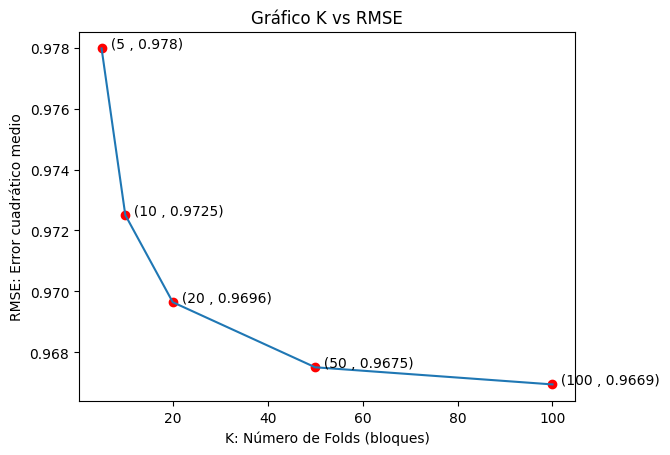

In [33]:
dicc ={'k_value(K)':k_value, 'error(RMSE)':error}
df=pd.DataFrame(dicc)


import matplotlib.pyplot as plt
import math
plt.plot(k_value,error)
plt.scatter(k_value, error,marker='o', color='r')
annotations=[]
for i in range(0,len(error)):
  annotations.append('  ('+ str(k_value[i]) + ' , ' + str(round(error[i],4)) +')')
for i, label in enumerate(annotations):
    plt.text(k_value[i], error[i],label)
plt.xlabel('K: Número de Folds (bloques)')
plt.ylabel('RMSE: Error cuadrático medio')
plt.title('Gráfico K vs RMSE')
plt.show()